
# Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from IPython.display import clear_output

plt.style.use("dark_background")

In [ ]:
tf.__version__

'2.17.0'

# Extracting Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [ ]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [ ]:
series = df["close"].values.reshape(-1, 1)
series.shape

(1259, 1)

* Wrong Way!

In [ ]:
scaler = StandardScaler()
scaler.fit(series[:-len(series) // 2])
series = scaler.transform(series).flatten()
series.shape

(1259,)

In [ ]:
T = 10
D = 1 # Since we have just Starbucks
X = []
Y = []

for t in range(len(series) - T):
    x = series[t: t+T]
    y = series[t+T]

    X.append(x)
    Y.append(y)

X = np.array(X).reshape(-1, T, D) # N x T x D
Y = np.array(Y)
N = X.shape[0]

# With Close Price

In [ ]:
i = Input(shape=(T, D))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)

model.compile(
    loss="mse",
    optimizer=Adam(learning_rate=0.1),
)

history = model.fit(
    X[:-N//2], Y[:-N//2],
    validation_data=(X[-N//2:], Y[-N//2:]),
    epochs=80
    )

Epoch 1/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - loss: 0.1762 - val_loss: 0.0584
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0129 - val_loss: 0.0307
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0092 - val_loss: 0.0428
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0066 - val_loss: 0.0321
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0070 - val_loss: 0.0178
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0056 - val_loss: 0.0186
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0057 - val_loss: 0.0329
Epoch 8/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0054 - val_loss: 0.0178
Epoch 9/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0056 - val_loss: 0.0457
Epoch 10/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0064 - val_loss: 0.0176
Epoch 11/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0053 - val_loss: 0.0164
Epoch 12/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0

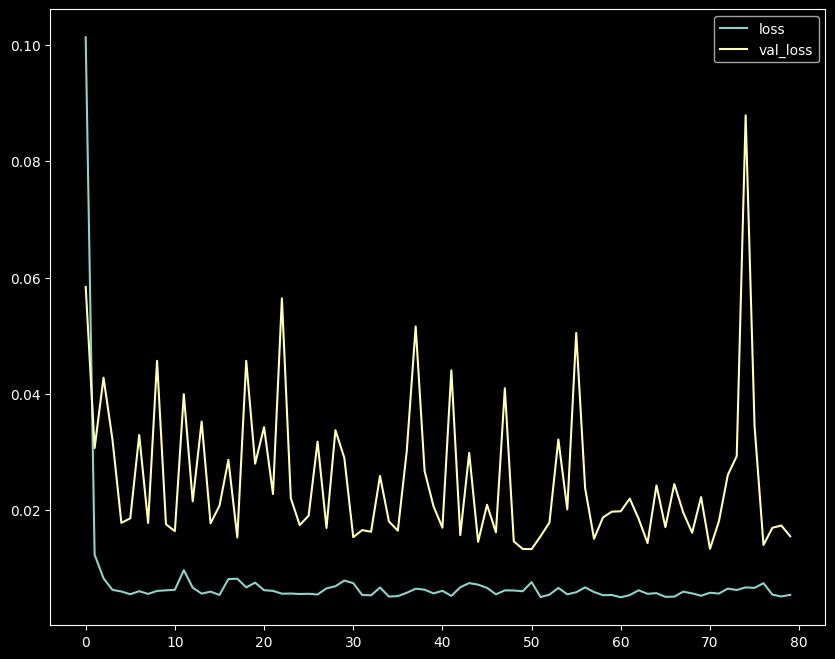

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

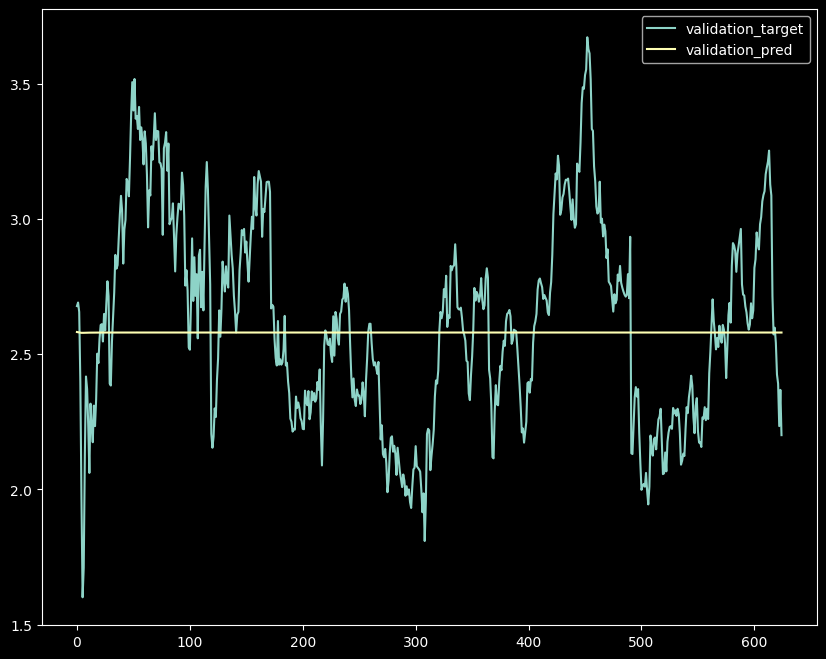

In [ ]:

validation_target = Y[-N//2:]
validation_pred = []

last_x = X[-N//2]

while len(validation_pred) < len(validation_target):
    p = model.predict(last_x.reshape(1, T, 1))[0, 0]
    validation_pred.append(p)

    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.figure(figsize=(10, 8))
plt.plot(validation_target, label="validation_target")
plt.plot(validation_pred, label="validation_pred")
plt.legend()

clear_output()

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(1249, 1)


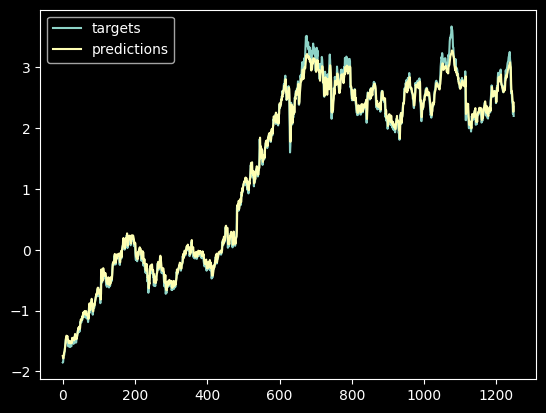

In [ ]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

# Stock Return Prices

In [ ]:
df["PrevClose"] = df["close"].shift(1)
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [ ]:
df["Return"] = (df["close"] - df["PrevClose"]) / df["PrevClose"]
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [ ]:
input_data = df[["open", "high", "low", "close", "volume"]].values
targets = df["Return"].values

In [ ]:
print(f"input_data.shape:{input_data.shape}, \ntargets.shape: {targets.shape}")

input_data.shape:(1259, 5), 
targets.shape: (1259,)


In [ ]:
T = 10
N = input_data.shape[0] - T # We want to have T shaped sample
D = input_data.shape[1]

N_train = N * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:N_train+T-1])
input_data = scaler.transform(input_data)

In [ ]:
X_train = np.zeros(shape=(N_train, T, D))
y_train = np.zeros(N_train)

for t in range(N_train):
    X_train[t, :, :] = input_data[t: t+T]
    y_train[t] = (targets[t+T] > 0)


X_test = np.zeros((N - N_train, T, D))
y_test = np.zeros(N-N_train)

for u in range(N - N_train):
    t = N_train + u
    X_test[u, :, :] = input_data[t: t + T]
    y_test[u] = (targets[t+T] > 0)


In [ ]:
X_train.shape

(832, 10, 5)

In [ ]:
X_test.shape

(417, 10, 5)

In [ ]:
i = Input(shape=(T, D))
x = LSTM(50, return_sequences=True)(i)
x = Dropout(0.2)(x)
x = LSTM(50, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)

model.compile(optimizer=Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=300)

Epoch 1/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.4975 - loss: 0.7029 - val_accuracy: 0.4868 - val_loss: 0.7097
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5115 - loss: 0.6968 - val_accuracy: 0.4868 - val_loss: 0.6954
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5268 - loss: 0.6933 - val_accuracy: 0.5132 - val_loss: 0.6924
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4778 - loss: 0.6962 - val_accuracy: 0.4868 - val_loss: 0.6944
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5290 - loss: 0.6927 - val_accuracy: 0.4868 - val_loss: 0.6946
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4688 - loss: 0.6955 - val_accuracy: 0.4868 - val_loss: 0.6944
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5316 - loss: 0.6920 - val_accuracy: 0.4868 - val_loss: 0.6948
Epoch 8/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5100 - loss: 0.6932 - val_accuracy: 0.

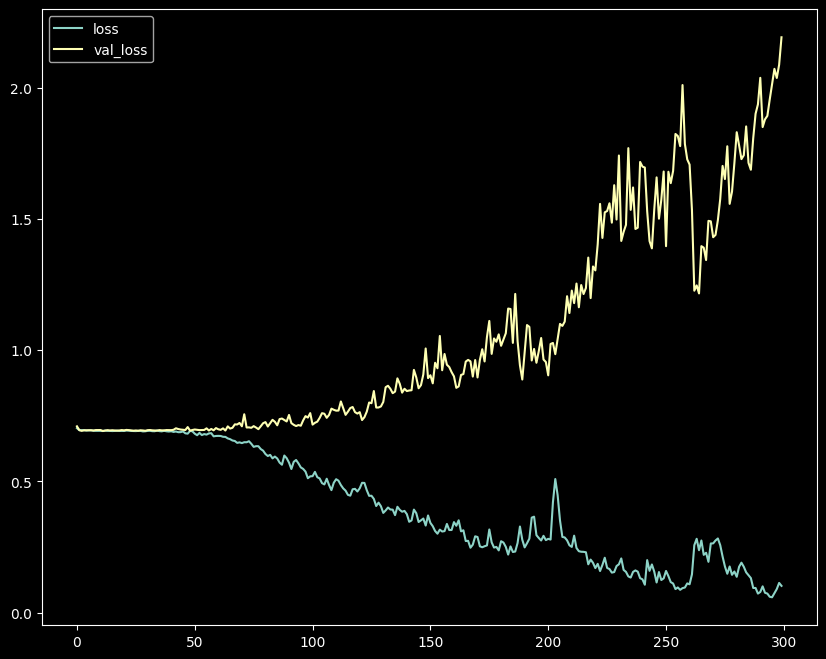

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

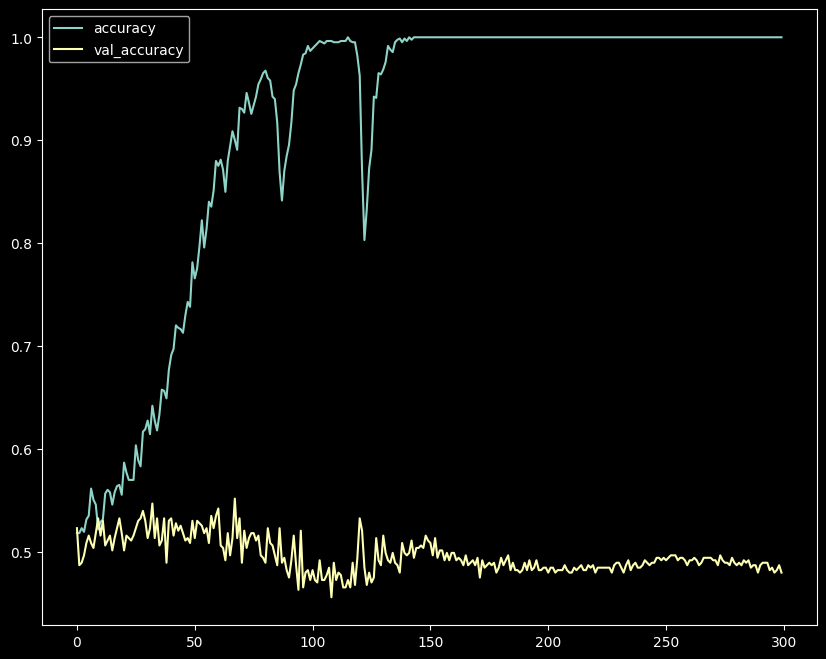

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()